In [1]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
data = catalog.load('data')
client_data = catalog.load('client_data')
client_transactions = catalog.load('client_transactions')
merged_data = catalog.load('merged_data')
data_groups = catalog.load('data_groups')

[11/30/24 22:14:47] INFO     Loading data from data (ParquetDataset)...                         ]8;id=755244;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=760578;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

[11/30/24 22:14:48] INFO     Loading data from client_data (ParquetDataset)...                  ]8;id=796200;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=701089;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

                    INFO     Loading data from client_transactions (ParquetDataset)...          ]8;id=276199;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=122354;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

                    INFO     Loading data from merged_data (ParquetDataset)...                  ]8;id=451185;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=481204;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

                    INFO     Loading data from data_groups (ParquetDataset)...                  ]8;id=110576;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=59706;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3070
Using device: cuda


In [ ]:
# TPOT Regressor setup
tpot = TPOTRegressor(config_dict=tpot_config_regression, generations=5, population_size=20, verbosity=2)

# Fit TPOT
tpot.fit(X_train, y_train)

# Evaluate the model
print(f"R2 score on test set: {tpot.score(X_test, y_test)}")

In [3]:
data.head()

Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  Internauta  \
0   1          160    M    13.0    43       NaN         130           1   
1   2          160    H    13.0    46  143640.0          69           1   
2   3          170    H    13.0    45  929106.0          24           1   
3   4          151    H    13.0    46  172447.0         134           0   
4   5          170    H    13.0    46  805250.0         116           0   

   Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  EeccNac_T01  \
0          1         0  ...        0.0        33000          0.0    1099866.0   
1          0         0  ...        0.0       300000          0.0     214592.0   
2          1         0  ...        0.0       216676          0.0          0.0   
3          1         0  ...        0.0        60000          0.0     272762.0   
4          1         1  ...        0.0       272925          0.0     249562.0   

   EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  target  
0          0.0  1099866.0      15080        0.0           R       0  
1          0.0   214592.0      83596        0.0           R       0  
2          0.0     7400.0          0        0.0           T       0  
3          0.0   272762.0      10591        0.0           R       0  
4          0.0    75339.0     377782        0.0           R       0  

[5 rows x 574 columns]

In [7]:
dataset_dictionary = {
    'data':data,
    'client_data':client_data,
    'client_transactions':client_transactions,
    'merged_data':merged_data    
}

for key in dataset_dictionary:
    rows=dataset_dictionary[key].shape[0]
    columns=dataset_dictionary[key].shape[1]
    print(f"The dataset {key} has {rows} rows and {columns} columns.")

The dataset client_data has 51124 rows and 7 columns.
The dataset client_transactions has 51124 rows and 145 columns.
The dataset merged_data has 51124 rows and 151 columns.


In [12]:
dataset_dictionary = {
    'client_data':client_data,
    'client_transactions':client_transactions    
}

for key in dataset_dictionary:
    print(f"Dataset {key}")
    for columna in dataset_dictionary[key].columns:
        print("\n----------------------------------------")
        print(f"The data type of the column {columna} is {dataset_dictionary[key][columna].dtype}.")
        if int(dataset_dictionary[key][columna].isna().sum()) > 1 or int(dataset_dictionary[key][columna].isna().sum()) == 0:
            nullified="nulls"
        else:
            nullified = "null"
        print(f"The column {columna} has {int(dataset_dictionary[key][columna].isna().sum())} {nullified}.")
        print("----------------------------------------\n")
    print("\n")

Dataset client_data

----------------------------------------
The data type of the column ID is int64.
The column ID has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column Sex is object.
The column Sex has 1 null.
----------------------------------------


----------------------------------------
The data type of the column Age is int64.
The column Age has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column PIN_Change is float64.
The column PIN_Change has 19388 nulls.
----------------------------------------


----------------------------------------
The data type of the column National is int64.
The column National has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column International is float64.
The column International has 0 nulls.
----------------------------------------


-----

In [8]:
nona = data_groups.dropna()

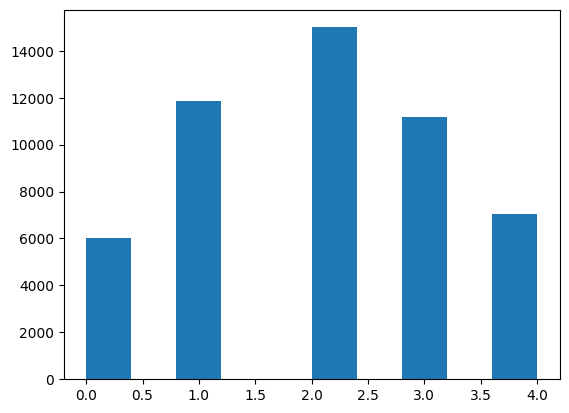

In [52]:
plt.hist(client_data['Age'])
plt.show()

In [28]:
print(merged_data.columns)

Index(['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International', 'Income',
       'Num_Acc', 'Mon_Act', 'Int_Bill_CC_01',
       ...
       'Adv_Bill_DC_12', 'Pur_Bill_DC_12', 'Act_Indi_CC_12', 'Int_Acti_CC_12',
       'Nac_Acti_CC_12', 'Num_Tran_CC_12', 'Int_Tran_CC_12', 'Nac_Tran_CC_12',
       'Adv_Tran_DC_12', 'Pur_Tran_DC_12'],
      dtype='object', length=153)


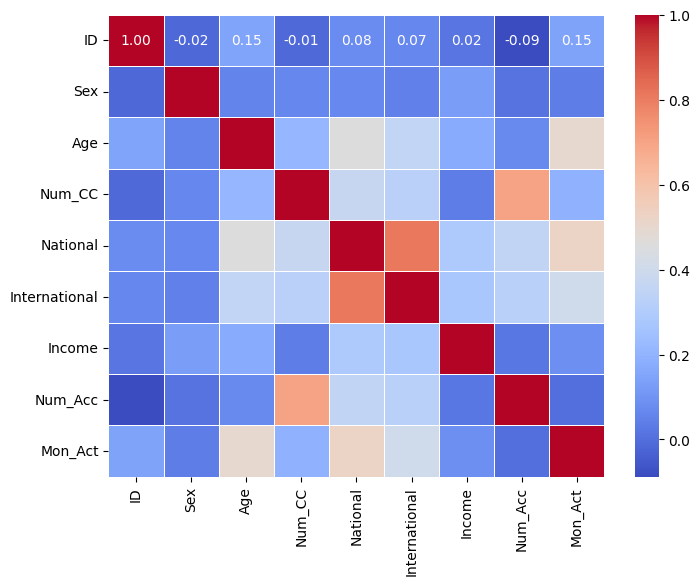

In [4]:
correlation_clientdata = client_data.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_clientdata, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

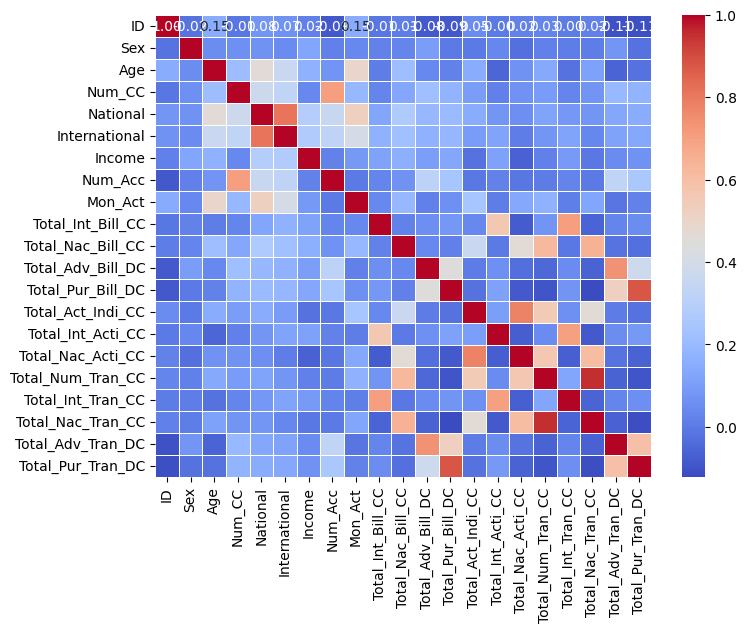

In [3]:
correlation_groups = data_groups.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
knn_imputer = KNNImputer(n_neighbors=10, weights='uniform')
imputed = pd.DataFrame(knn_imputer.fit_transform(data_groups), columns=data_groups.columns)

In [9]:
dat = pd.DataFrame()
dat['Num_Acc'] = imputed['Num_Acc']
dat['National'] = imputed['National']
dat['International'] = imputed['International']

entreno, validacion, testeo = np.split(dat.sample(frac=1), [int(0.6*len(dat)), int(0.8*len(dat))])

entreno, X_entreno, y_entreno = scale_dataset(entreno, oversample=True)
validacion, X_validacion, y_validacion = scale_dataset(validacion, oversample=False)
testeo, X_testeo, y_testeo = scale_dataset(testeo, oversample=False)

[11/30/24 22:19:00] WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\numpy\_core\fromn ]8;id=953644;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=831179;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             umeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and                   
                             will be removed in a future version. Please use 'DataFrame.transpose'                 
                             instead.                                                                              
                               return bound(*args, **kwds)                                                         
                                                                                                                   

In [5]:
tpot_config_regression = {
    'xgboost.XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': range(3, 10),
        'learning_rate': [0.01, 0.1, 0.2],
        'booster': ['gbtree', 'dart'],
        'tree_method': ['gpu_hist'],  # Use GPU
        'objective': ['reg:squarederror'],  # Regression objective
    },
    'lightgbm.LGBMRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': range(3, 10),
        'learning_rate': [0.01, 0.1, 0.2],
        'boosting_type': ['gbdt'],
        'device': ['gpu'],  # Use GPU
    }
}

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = XGBRegressor(
    booster='dart',               
    learning_rate=0.2,            
    max_depth=3,                  
    n_estimators=100,             
    objective='reg:squarederror', 
    tree_method='gpu_hist'        
)

model.fit(X_entreno, y_entreno)

y_pred = model.predict(X_validacion)
  # Mean Squared Error
mse = mean_squared_error(y_validacion, y_pred)

  # Mean Absolute Error
mae = mean_absolute_error(y_validacion, y_pred)

  # R^2 Score
r2 = r2_score(y_validacion, y_pred)

  # Root Mean Squared Error
rmse = mean_squared_error(y_validacion, y_pred, squared=False)
  # Print all the metrics
print("----------------------------------------")
print(f"Mean Squared Error: {mse}\n")
print(f"Mean Absolute Error: {mae}\n")
print(f"R^2: {r2}\n")
print(f"Root Mean Squared Error: {rmse}\n")

print(f"Puntaje del modelo: {model.score(X_validacion, y_validacion)}\n")

[11/30/24 22:20:04] WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\xgboost\core.py:1 ]8;id=159021;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=300726;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             58: UserWarning: [22:20:04] WARNING:                                                  
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-00                
                             15a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[11/30/24 22:20:12] WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\xgboost\core.py:1 ]8;id=431645;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=685768;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             58: UserWarning: [22:20:12] WARNING:                                                  
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-00                
                             15a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

                    WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\metrics\_ ]8;id=488245;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=343530;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             regression.py:492: FutureWarning: 'squared' is deprecated in version                  
                             1.4 and will be removed in 1.6. To calculate the root mean squared                    
                             error, use the function'root_mean_squared_error'.                                     
                               warnings.warn(                                                                      
                                                                                                                   

----------------------------------------
Mean Squared Error: 987005.2528375684

Mean Absolute Error: 655.1330891823617

R^2: 0.612871585637006

Root Mean Squared Error: 993.4813802168455

Puntaje del modelo: 0.612871585637006



In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_entreno, y_entreno)
y_pred = model.predict(X_validacion)

  # Assuming y_true are the true values and y_pred are the predicted values

  # Mean Squared Error
mse = mean_squared_error(y_validacion, y_pred)

  # Mean Absolute Error
mae = mean_absolute_error(y_validacion, y_pred)

  # R^2 Score
r2 = r2_score(y_validacion, y_pred)

  # Root Mean Squared Error
rmse = mean_squared_error(y_validacion, y_pred, squared=False)

  # Print all the metrics
print("----------------------------------------")
print(f"Mean Squared Error: {mse}\n")
print(f"Mean Absolute Error: {mae}\n")
print(f"R^2: {r2}\n")
print(f"Root Mean Squared Error: {rmse}\n")

print(f"Puntaje del modelo: {model.score(X_validacion, y_validacion)}\n")

[11/29/24 20:15:49] WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\metrics\_ ]8;id=710072;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=810720;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             regression.py:492: FutureWarning: 'squared' is deprecated in version                  
                             1.4 and will be removed in 1.6. To calculate the root mean squared                    
                             error, use the function'root_mean_squared_error'.                                     
                               warnings.warn(                                                                      
                                                                                                                   

----------------------------------------
Mean Squared Error: 934353.0249552875

Mean Absolute Error: 568.8896295140518

R^2: 0.6450811340798288

Root Mean Squared Error: 966.6193795674114

Puntaje del modelo: 0.6450811340798288



In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [48]:
from tpot import TPOTRegressor
tpot_regressor = TPOTRegressor(verbosity=2, generations=10, population_size=40, random_state=42, scoring='r2')
tpot_regressor.fit(X_entreno, y_entreno)


print("Regresión Score (R²):", tpot_regressor.score(X_validacion, y_validacion))


y_pred = tpot_regressor.predict(X_validacion)


mae = mean_absolute_error(y_validacion, y_pred)
mse = mean_squared_error(y_validacion, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validacion, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Optimization Progress:   0%|          | 0/440 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│    1 from tpot import TPOTRegressor                                                              │
│    2 tpot_regressor = TPOTRegressor(verbosity=2, generations=10, population_size=40, random_s    │
│ ❱  3 tpot_regressor.fit(X_entreno, y_entreno)                                                    │
│    4                                                                                             │
│    5                                                                                             │
│    6 print("Regresión Score (R²):", tpot_regressor.score(X_validacion, y_validacion))            │
│                                                                                                  │
│ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\base.py:864 in fit                     │
│                                                                                                  │
│    861 │   │   │   │   except (KeyboardInterrupt, SystemExit, Exception) as e:                   │
│    862 │   │   │   │   │   # raise the exception if it's our last attempt                        │
│    863 │   │   │   │   │   if attempt == (attempts - 1):                                         │
│ ❱  864 │   │   │   │   │   │   raise e                                                           │
│    865 │   │   │   return self                                                                   │
│    866 │                                                                                         │
│    867 │   def _setup_memory(self):                                                              │
│                                                                                                  │
│ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\base.py:855 in fit                     │
│                                                                                                  │
│    852 │   │   │   │   │   if not isinstance(self._pbar, type(None)):                            │
│    853 │   │   │   │   │   │   self._pbar.close()                                                │
│    854 │   │   │   │   │                                                                         │
│ ❱  855 │   │   │   │   │   self._update_top_pipeline()                                           │
│    856 │   │   │   │   │   self._summary_of_best_pipeline(features, target)                      │
│    857 │   │   │   │   │   # Delete the temporary cache before exiting                           │
│    858 │   │   │   │   │   self._cleanup_memory()                                                │
│                                                                                                  │
│ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\base.py:935 in _update_top_pipeline    │
│                                                                                                  │
│    932 │   │   │   │   │   │   │   error_score="raise",                                          │
│    933 │   │   │   │   │   │   )                                                                 │
│    934 │   │   │   │   │   │   break                                                             │
│ ❱  935 │   │   │   │   raise RuntimeError(                                                       │
│    936 │   │   │   │   │   "There was an error in the TPOT optimization "                        │
│    937 │   │   │   │   │   "process. This could be because the data was "                        │
│    938 │   │   │   │   │   "not formatted properly, because a timeout "                          │
╰────────────────────────────────────────────────────────────


(
    [
    ],
    [Text(0, 0, '0'), Text(5, 0, '5'), Text(10, 0, '10'), Text(15, 0, '15'), Text(20, 0, '20')]
)

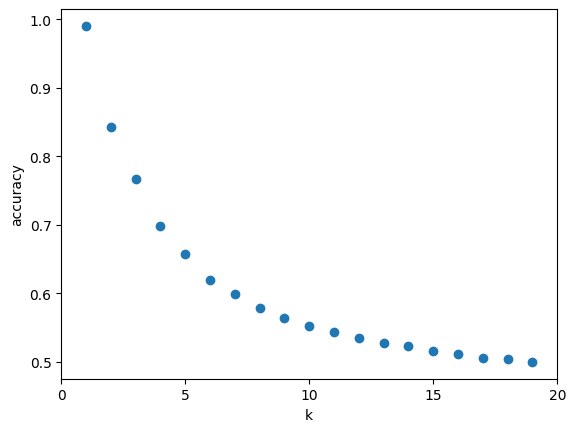

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entreno, y_entreno)
    scores.append(knn.score(X_entreno, y_entreno))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_entreno, y_entreno)

y_pred = knn_model.predict(X_testeo)

print(classification_report(y_testeo, y_pred))

              precision    recall  f1-score   support

         0.0       0.35      0.55      0.43      1254
         1.0       0.32      0.28      0.30      2386
         2.0       0.36      0.28      0.32      2938
         3.0       0.30      0.25      0.27      2262
         4.0       0.26      0.38      0.31      1385

    accuracy                           0.32     10225
   macro avg       0.32      0.35      0.32     10225
weighted avg       0.32      0.32      0.31     10225



In [41]:
# Entrenar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_entreno, y_entreno)

# Hacer predicciones
y_pred = logistic_model.predict(X_testeo)

# Evaluar el modelo
print(classification_report(y_testeo, y_pred))

              precision    recall  f1-score   support

         0.0       0.37      0.81      0.51      1203
         1.0       0.30      0.31      0.31      2390
         2.0       0.40      0.23      0.30      3020
         3.0       0.29      0.15      0.20      2185
         4.0       0.38      0.59      0.47      1427

    accuracy                           0.35     10225
   macro avg       0.35      0.42      0.36     10225
weighted avg       0.35      0.35      0.33     10225



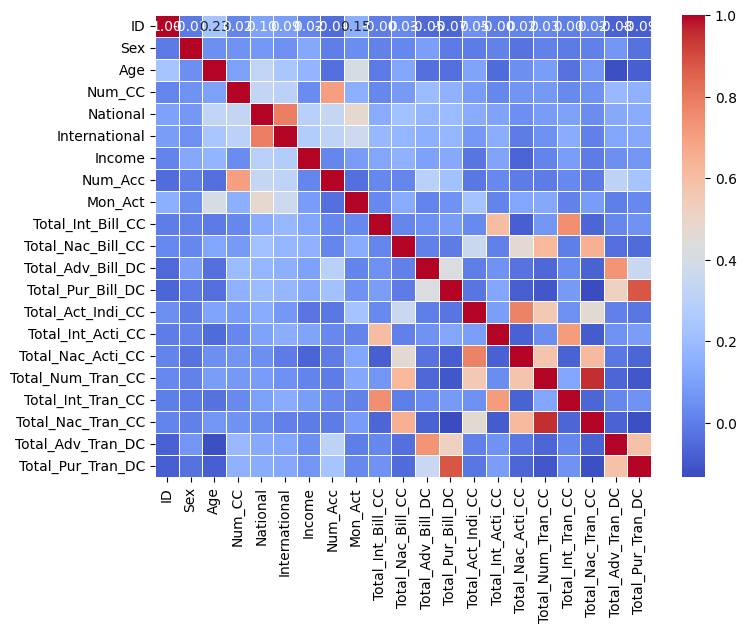

In [9]:
correlation_groups_no_nan = nona.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups_no_nan, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

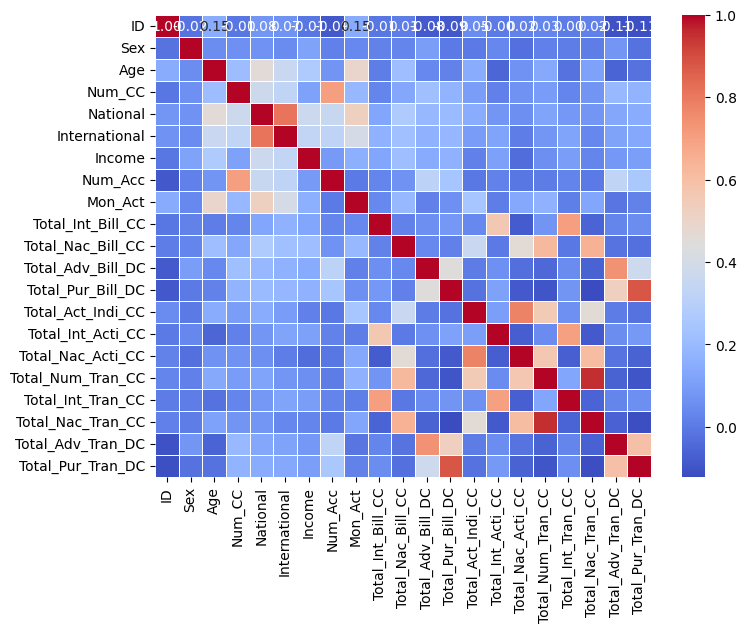

In [11]:
correlation_groups_imputed = imputed.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups_imputed, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

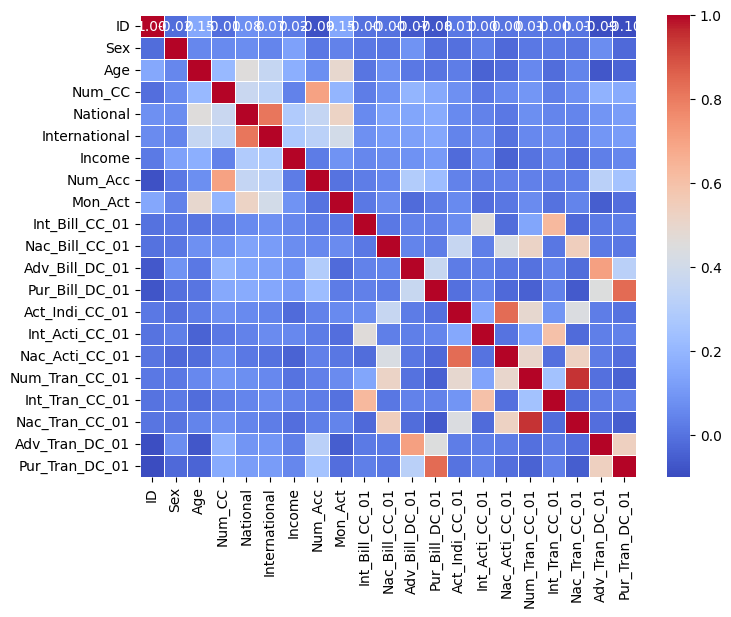

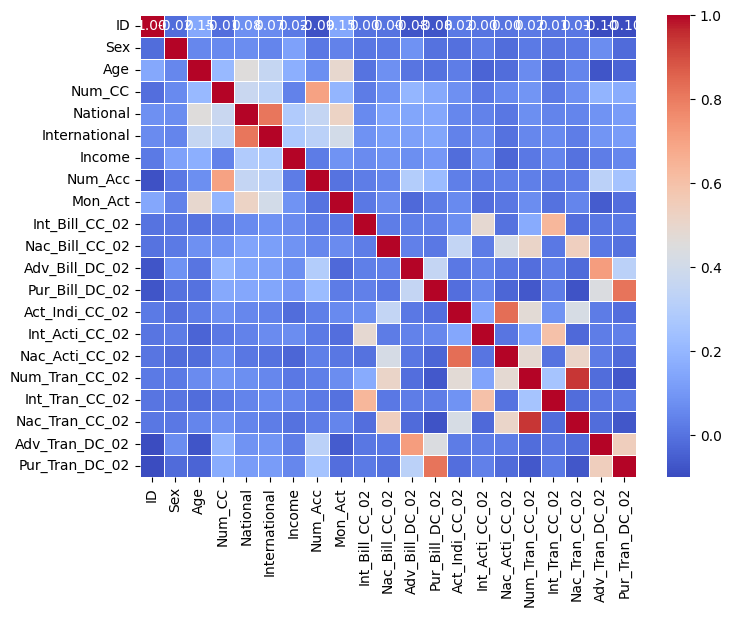

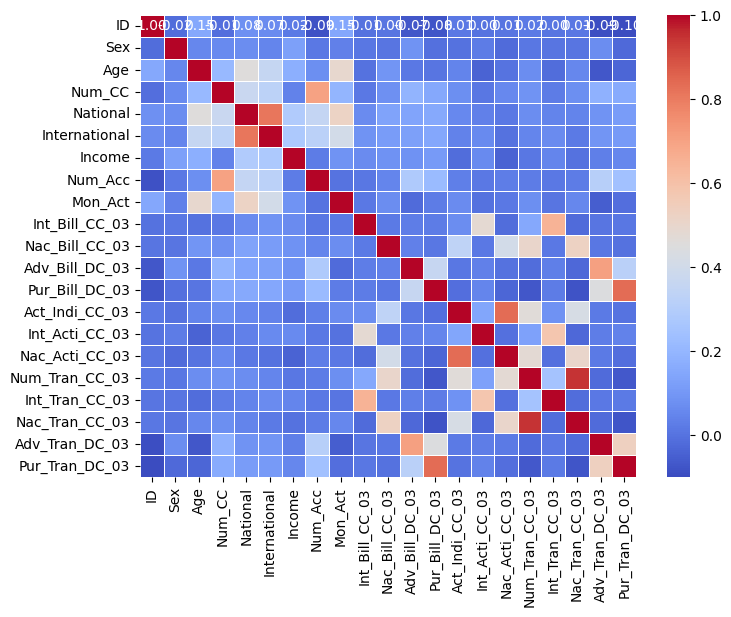

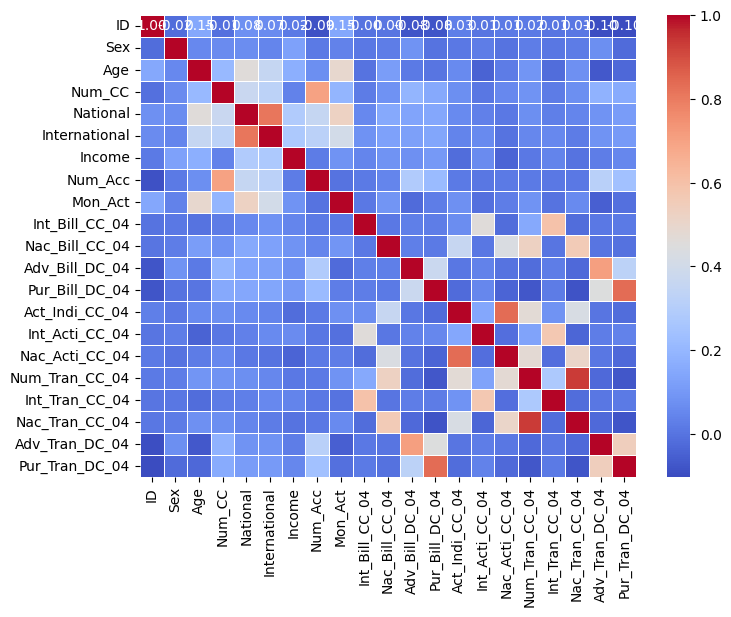

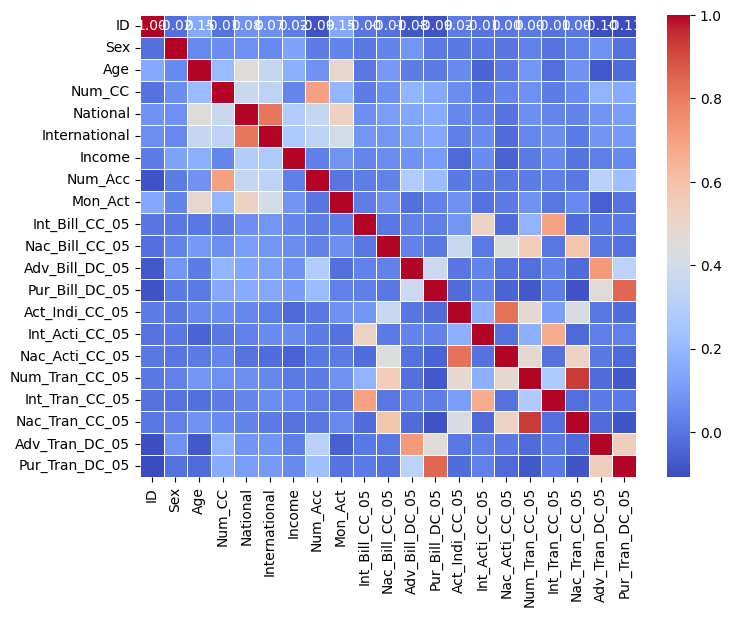

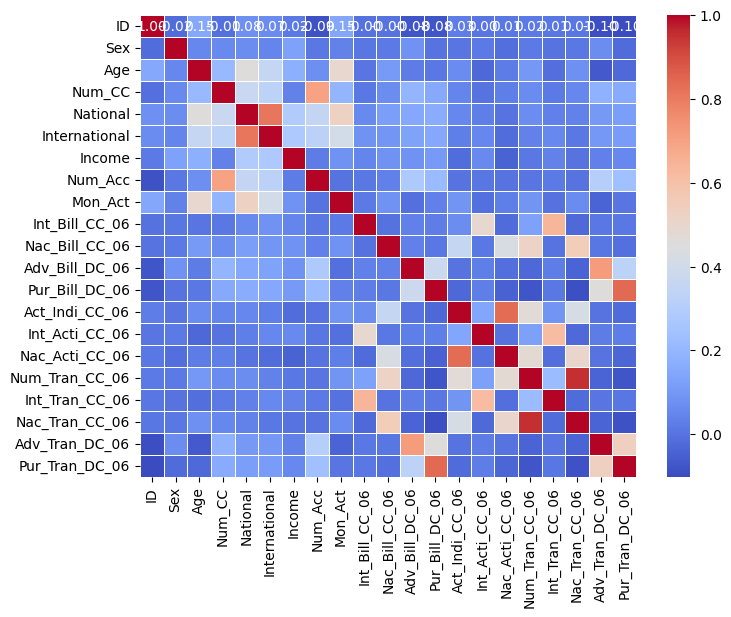

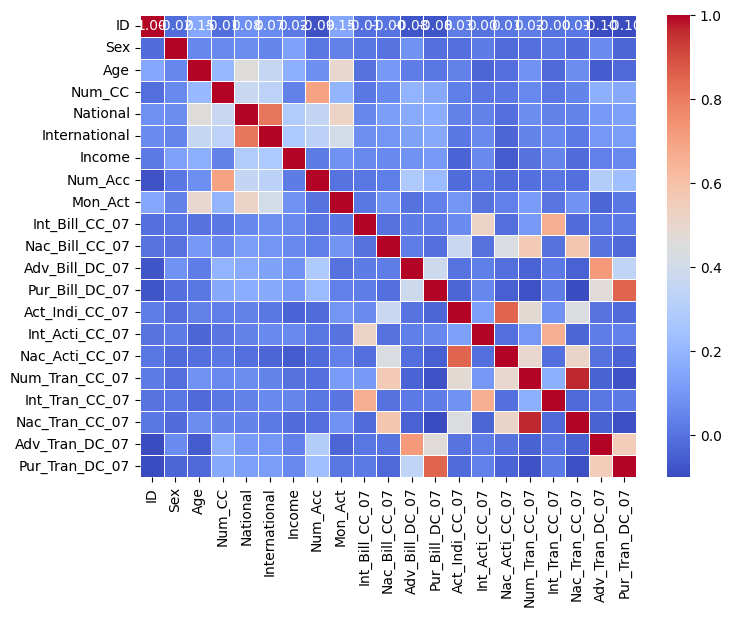

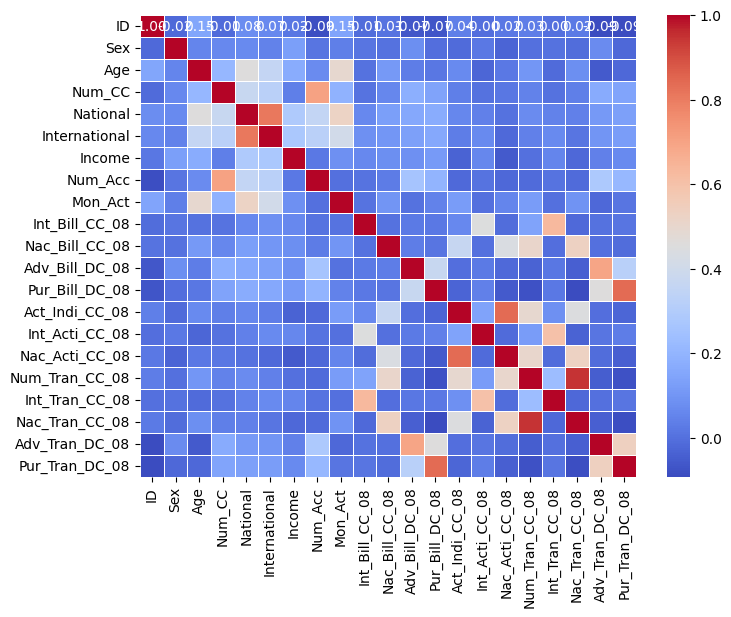

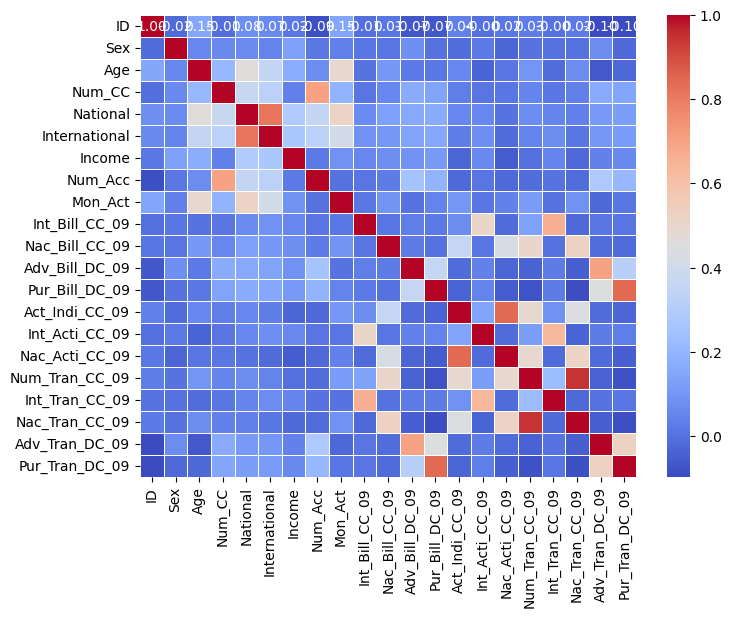

In [54]:
for i in range(1,10):
    correlation_merge = merged_data[['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International','Income','Num_Acc','Mon_Act',
            f'Int_Bill_CC_0{i}', f'Nac_Bill_CC_0{i}',f'Adv_Bill_DC_0{i}',f'Pur_Bill_DC_0{i}', 
           f'Act_Indi_CC_0{i}', f'Int_Acti_CC_0{i}',f'Nac_Acti_CC_0{i}', f'Num_Tran_CC_0{i}', 
        f'Int_Tran_CC_0{i}', f'Nac_Tran_CC_0{i}',f'Adv_Tran_DC_0{i}', f'Pur_Tran_DC_0{i}']].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_merge, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Show the plot
    plt.show()

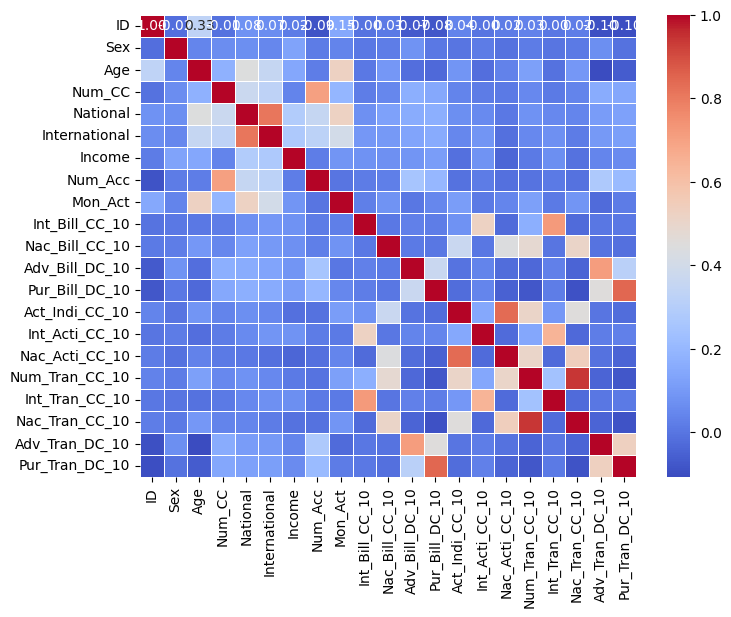

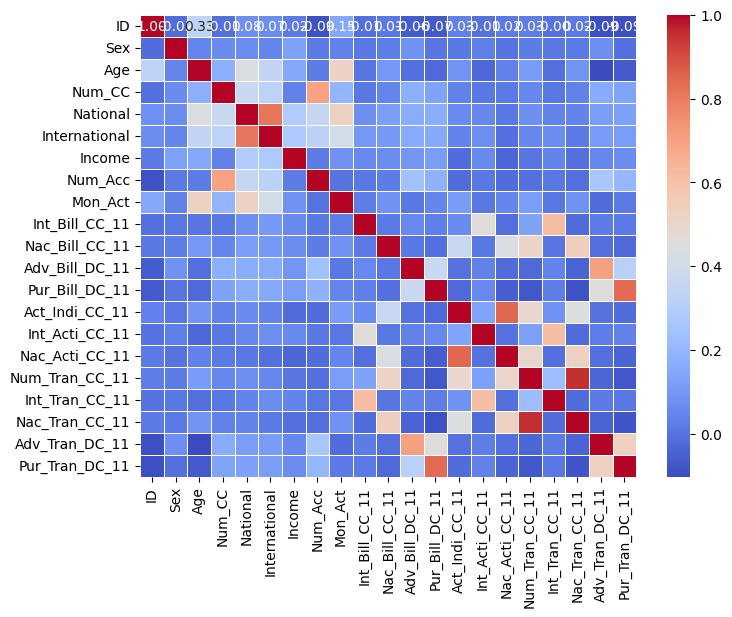

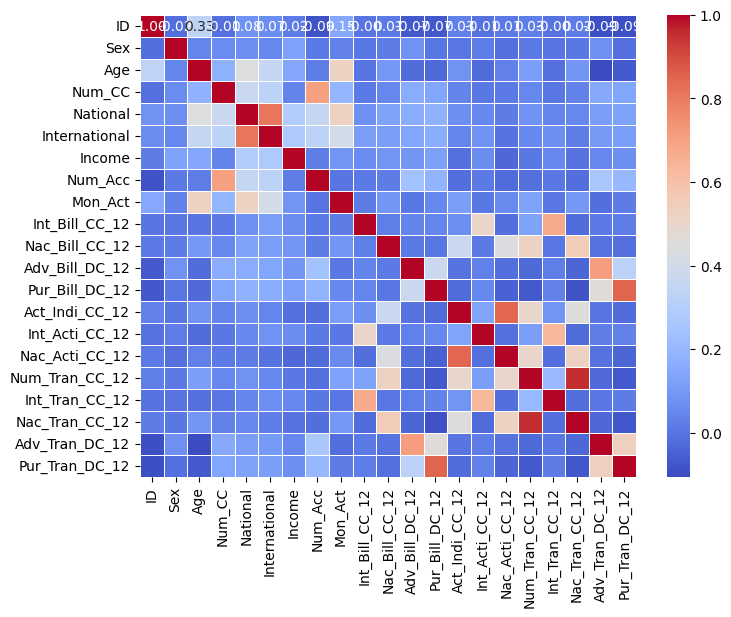

In [30]:
for i in range(10,13):
    correlation_merge = merged_data[['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International','Income','Num_Acc','Mon_Act',
            f'Int_Bill_CC_{i}', f'Nac_Bill_CC_{i}',f'Adv_Bill_DC_{i}',f'Pur_Bill_DC_{i}', 
           f'Act_Indi_CC_{i}', f'Int_Acti_CC_{i}',f'Nac_Acti_CC_{i}', f'Num_Tran_CC_{i}', 
        f'Int_Tran_CC_{i}', f'Nac_Tran_CC_{i}',f'Adv_Tran_DC_{i}', f'Pur_Tran_DC_{i}']].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_merge, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Show the plot
    plt.show()

In [14]:
# TPOT Regressor setup
from tpot import TPOTRegressor
tpot = TPOTRegressor(config_dict=tpot_config_regression, generations=5, population_size=20, verbosity=2)

# Fit TPOT
tpot.fit(X_entreno, y_entreno)

# Evaluate the model
print(f"R2 score on test set: {tpot.score(X_testeo, y_testeo)}")

[11/30/24 15:51:27] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=675670;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=512160;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[11/30/24 15:51:38] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=296671;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=645809;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 4
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (0.00 MB) transferred to GPU in 0.001077 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 15:51:57] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=866736;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=188363;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[11/30/24 15:52:08] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=52380;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=547503;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                              

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.001661 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 15:52:24] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=349153;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=757397;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.001778 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 5941196, number of used features: 4
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (22.66 MB) transferred to GPU in 0.079048 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3805.967065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Exception ignored on calling ctypes callback function: <function _log_callback at 0x000002609A2D99E0>
Traceback (most recent call last):
  File "C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\lightgbm\basic.py", line 257, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
stopit.utils.TimeoutException: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[11/30/24 16:33:51] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=718867;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=683935;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.000427 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 16:34:03] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=570824;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=873781;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 4
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (0.00 MB) transferred to GPU in 0.000430 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 17:15:45] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=388346;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=924370;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.000561 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 17:15:56] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=273682;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=147345;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (0.00 MB) transferred to GPU in 0.000523 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 18:02:28] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=734037;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=589270;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[11/30/24 18:02:39] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=436774;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=414041;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[11/30/24 18:02:51] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=558222;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=945260;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 5941196, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (22.66 MB) transferred to GPU in 0.025324 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3805.967065
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 5941196, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[Li

[11/30/24 18:29:32] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=831751;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=835668;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 3
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 3 dense feature groups (0.00 MB) transferred to GPU in 0.000498 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3362.020000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[11/30/24 18:29:58] WARNING  Code block execution exceeded 10 seconds timeout                           ]8;id=421486;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py\utils.py]8;;\:]8;id=563820;file://C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py#81\81]8;;\
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\stopit\utils.py:1 │            
                             │ 45 in wrapper                                                          │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\tpot\decorators.p │            
                             │ y:57 in time_limited_call                                              │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\sklearn\base.py:1 │            
                             │ 473 in wrapper                                                         │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                             

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 5941196, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 2 dense feature groups (22.66 MB) transferred to GPU in 0.026364 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 3805.967065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 5941196, number of used features: 2
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU pr

[11/30/24 18:52:41] WARNING  C:\Users\crist\desktop\kedro\.venv\Lib\site-packages\xgboost\core.py:1 ]8;id=492964;file://C:\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=879279;file://C:\Python311\Lib\warnings.py#109\109]8;;\
                             58: UserWarning: [18:52:40] WARNING:                                                  
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-00                
                             15a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

R2 score on test set: -1016280.9626846577
